In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Lung Cancer.csv")
df.shape

(890000, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

# Questions
1. What age range of people suffers the most from lung cancer?

2. Who suffers the most, Male or Female?

3. Which country has the most lung cancer patients?

4. What stage of cancer is the most common, analyzed by gender?

5. Does smoking increase the chance of lung cancer?

6. Can lung cancer happen due to family history?

7. Which treatment type (treatment_type) has the highest survival rate (survived)?
   

## Question 1
- What age range of people suffers the most from lung cancer?

In [4]:
# Fixing the datatype

df.diagnosis_date = pd.to_datetime(df.diagnosis_date)
df.end_treatment_date = pd.to_datetime(df.end_treatment_date)

In [5]:
df_num = df.select_dtypes("number")

<Axes: xlabel='age'>

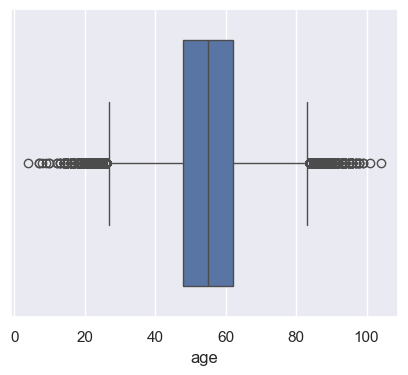

In [6]:
plt.figure(figsize=(5,4))
sns.set(style = 'darkgrid')
sns.boxplot(x=df.age)

### Outlair treatment on age

In [7]:
def cal_fence(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower_fence = q1- (1.5*iqr)
    upper_fence = q3+(1.5*iqr)
    return lower_fence,upper_fence

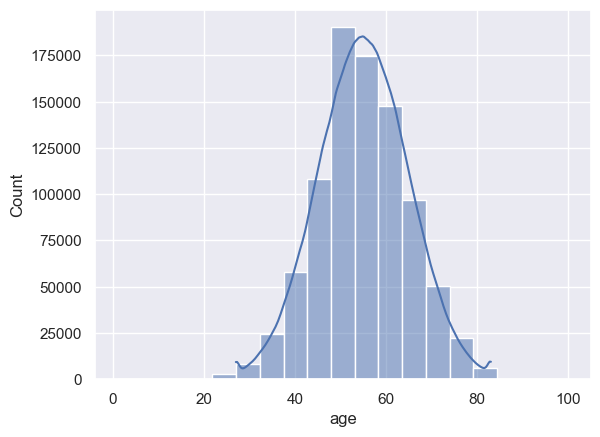

In [8]:
lf,uf = cal_fence(df.age)

df['age'] = df['age'].clip(lower = lf,upper = uf)
sns.histplot(df['age'],
             bins = np.linspace(1,100,20),
             kde=True,
             palette='icefire')
plt.show()

### Question 1 Answers and insights
- The age range between 45-65 years old people suffers the most by lung cancer.
- The lung cancer distribution by age is normaly distributed.

## Question 2
- Who suffers the most, Male or Female?

In [9]:
df.head(2)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1


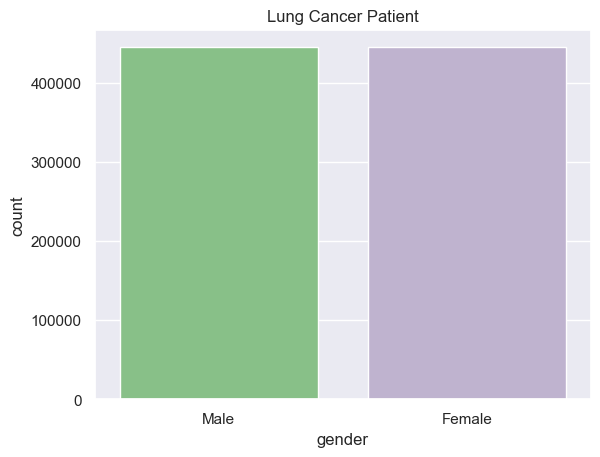

In [10]:

sn = sns.countplot(x = df.gender,
                   palette='Accent')
sn.set(title = 'Lung Cancer Patient')
plt.show()

In [11]:
df.value_counts(df.gender)

gender
Male      445134
Female    444866
Name: count, dtype: int64

### Question 2 Answer
- We can observe that the count of male and female patient of lung cancer is pretty much the same.

## Question 3
- Which country has the most lung cancer patients?

In [12]:
df.head(2)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1


In [13]:
df.country.unique()

array(['Sweden', 'Netherlands', 'Hungary', 'Belgium', 'Luxembourg',
       'Italy', 'Croatia', 'Denmark', 'Malta', 'Germany', 'Poland',
       'Ireland', 'Romania', 'Spain', 'Greece', 'Estonia', 'Cyprus',
       'France', 'Slovenia', 'Latvia', 'Portugal', 'Austria',
       'Czech Republic', 'Finland', 'Lithuania', 'Slovakia', 'Bulgaria'],
      dtype=object)

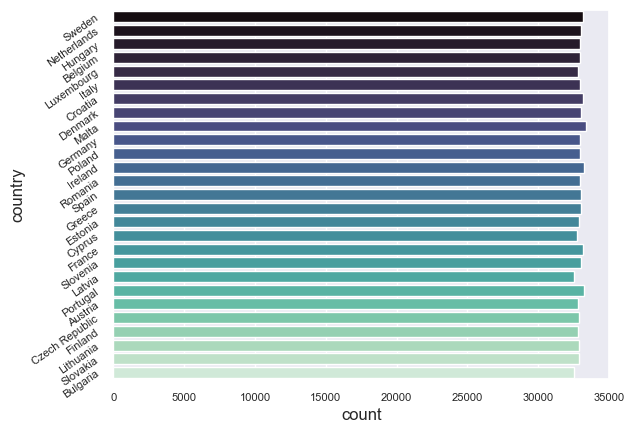

In [14]:
sns.countplot(y = df.country,
              palette='mako')
plt.yticks(fontsize=8, rotation=35)
plt.xticks(fontsize=8)
plt.show()

In [15]:
df.value_counts(df.country)

country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

### Question 3 answer
- Malta has the highest lung cancer patient. But one thing to notice here is that all the country surprisingly almost have the same patient count.

## Question 4
- What stage of cancer is the most common, analyzed by gender?

In [16]:
df.head(2)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1


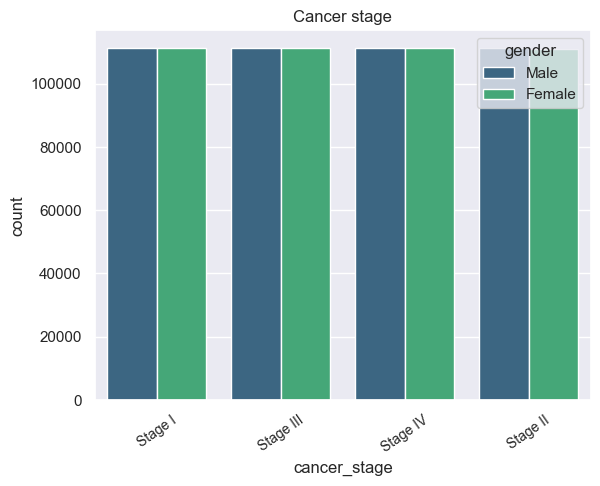

In [17]:
sns.countplot(x = df.cancer_stage,
              hue = df.gender,
              palette="viridis")
plt.xticks(fontsize=10,rotation = 35)
plt.title('Cancer stage')
plt.show()


In [18]:
df.value_counts(df.cancer_stage)

cancer_stage
Stage III    222594
Stage IV     222527
Stage I      222516
Stage II     222363
Name: count, dtype: int64

### Question 4 answer
- Surprisingly the four stage of cancer seems equally distributed. Also noticable that it is distributed in male and female equally Seems a bit off.

## Question 5
- Does smoking increase the chance of lung cancer?

In [19]:
df.head(10)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
5,6,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0
6,7,49.0,Female,Croatia,2018-05-21,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1
7,8,51.0,Male,Denmark,2017-02-18,Stage IV,Yes,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0
8,9,64.0,Male,Sweden,2021-03-21,Stage III,Yes,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0
9,10,56.0,Male,Hungary,2021-11-30,Stage IV,Yes,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0


In [20]:
df.smoking_status.unique()

array(['Passive Smoker', 'Former Smoker', 'Never Smoked',
       'Current Smoker'], dtype=object)

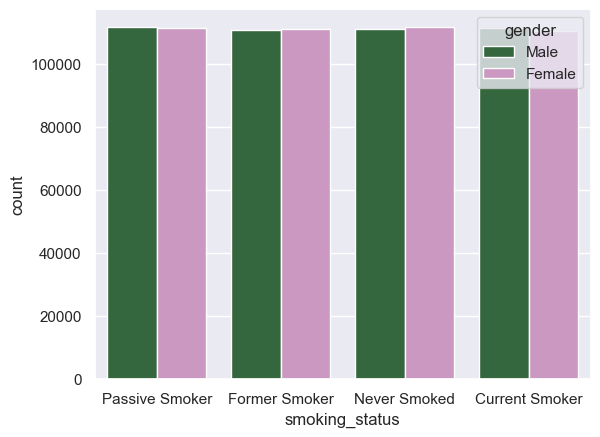

In [21]:
sns.countplot(x = df.smoking_status,
              palette='cubehelix',
              hue = df.gender)
plt.show()

In [22]:
ds = df.value_counts(df.smoking_status).reset_index()
total = ds['count'].sum()
ds['percentage'] = ((ds['count']/total) *100).round(2)
for index,row in ds.iterrows():
    ind = index;
    ty = row['smoking_status']
    count = row['count']
    print(f'{ty} {((count/total)*100):.2f}%')

Passive Smoker 25.08%
Never Smoked 25.03%
Former Smoker 24.96%
Current Smoker 24.93%


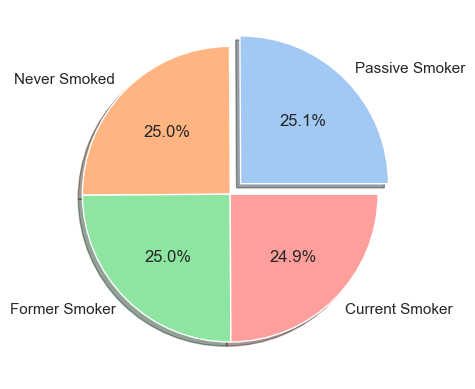

In [23]:
colors = sns.color_palette("pastel")
plt.pie(ds.percentage,
        labels=ds.smoking_status,
        autopct='%1.1f%%',
        colors = colors,
        explode = [0.1,0,0,0],
        shadow = True)
plt.show()

## Question 5 answer
- Passive smoker and the person who never smoke has the same chance of effected by lung cancer which seems not correct and maybe due to data taking issue.

## Question 6
- Can lung cancer happen due to family history?


In [24]:
df.family_history = df.family_history.map({'Yes':1,'No':0})

In [25]:
df.head(2)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1


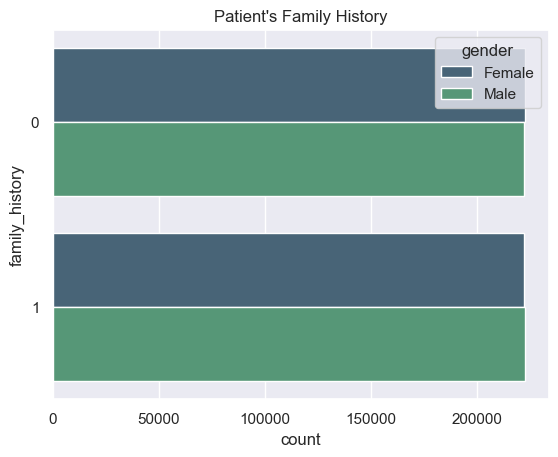

In [26]:

sns.countplot(y = "family_history",
              data = df,
              palette='viridis',
              hue = df['gender'],
              saturation = 0.5)
plt.title("Patient's Family History")
plt.show()

### Question 5 Answer
- Those who have family history of lung cancer is almost same as who doesn,t have family history.In both case the count is same according to the data.

## Question 7
- Which treatment type (treatment_type) has the highest survival rate (survived)?

In [27]:
df.head(10)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
5,6,50.0,Male,Italy,2023-01-02,Stage I,0,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0
6,7,49.0,Female,Croatia,2018-05-21,Stage III,1,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1
7,8,51.0,Male,Denmark,2017-02-18,Stage IV,1,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0
8,9,64.0,Male,Sweden,2021-03-21,Stage III,1,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0
9,10,56.0,Male,Hungary,2021-11-30,Stage IV,1,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0


In [28]:
df.treatment_type.unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [29]:
df.groupby('treatment_type')["survived"].value_counts().reset_index()

,treatment_type,survived,count
0,Chemotherapy,0,174426
1,Chemotherapy,1,48836
2,Combined,0,173607
3,Combined,1,49002
4,Radiation,0,172154
5,Radiation,1,48714
6,Surgery,0,173809
7,Surgery,1,49452


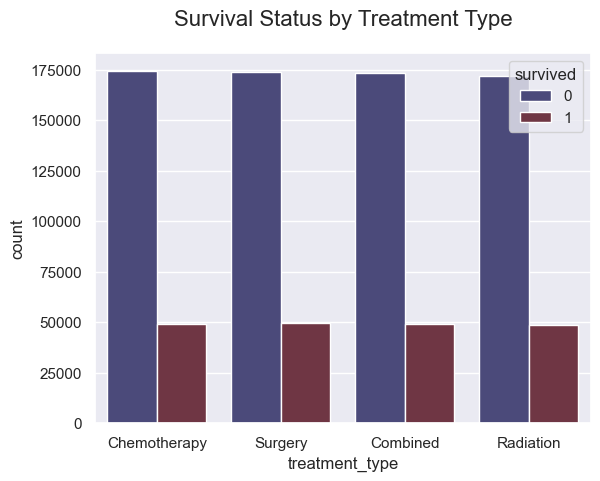

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  890000 non-null  int64         
 1   age                 890000 non-null  float64       
 2   gender              890000 non-null  object        
 3   country             890000 non-null  object        
 4   diagnosis_date      890000 non-null  datetime64[ns]
 5   cancer_stage        890000 non-null  object        
 6   family_history      890000 non-null  int64         
 7   smoking_status      890000 non-null  object        
 8   bmi                 890000 non-null  float64       
 9   cholesterol_level   890000 non-null  int64         
 10  hypertension        890000 non-null  int64         
 11  asthma              890000 non-null  int64         
 12  cirrhosis           890000 non-null  int64         
 13  other_cancer        890000 no

In [30]:
sns.countplot(x = 'treatment_type',
              hue = 'survived',
              data = df,
              palette='icefire')
plt.title('Survival Status by Treatment Type', fontsize=16, pad=20)

plt.show()
df.info()

<Axes: >

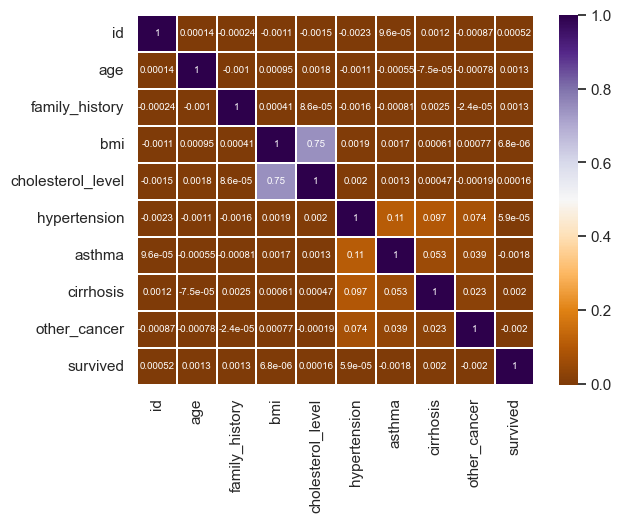

In [31]:
sns.set(style = "whitegrid")
sns.heatmap(df.select_dtypes('number').corr(),
            cmap = "PuOr",
            annot = True,
            annot_kws={"fontsize":7,"color":'white'},
            linewidth = 0.1)

## Question 7 answer
- Survival chance is low for each on the treatment type and each type of treatment type shows the same survival and dead ratio.

# Final Thoughts
- We can easily see that there is a problem is the data. The information ratio of each catagorial colums is almost the same which should not be like that and not possible. Like in the question 7 we can see that every treatement type has the same output which is not possible.
- So final vardict is there is a problem in dataset but for practicing purpous it is fine.